In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Data Exploration and Visualization:

In [41]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [42]:
df["Selling_Price"] = df["Selling_Price"] * 11286
df["Present_Price"] = df["Present_Price"] * 11286
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,37808.1,63088.74,27000,Petrol,Dealer,Manual,0
1,sx4,2013,53608.5,107668.44,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,81823.5,111167.10,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,32165.1,46836.90,5200,Petrol,Dealer,Manual,0
4,swift,2014,51915.6,77534.82,42450,Diesel,Dealer,Manual,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [44]:
df["Car_Name"].nunique() # we have 98 different car models, we need to drop this feature

98

In [45]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,3.010000e+02,301.000000,301.000000
mean,2013.627907,52607.383056,8.609493e+04,36947.205980,0.043189
std,2.891554,57364.611223,9.755749e+04,38886.883882,0.247915
min,2003.000000,1128.600000,3.611520e+03,500.000000,0.000000
25%,2012.000000,10157.400000,1.354320e+04,15000.000000,0.000000
50%,2014.000000,40629.600000,7.223040e+04,32000.000000,0.000000
75%,2016.000000,67716.000000,1.117314e+05,48767.000000,0.000000
max,2018.000000,395010.000000,1.045084e+06,500000.000000,3.000000


In [46]:
df.corr()["Selling_Price"]

Year             0.236141
Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

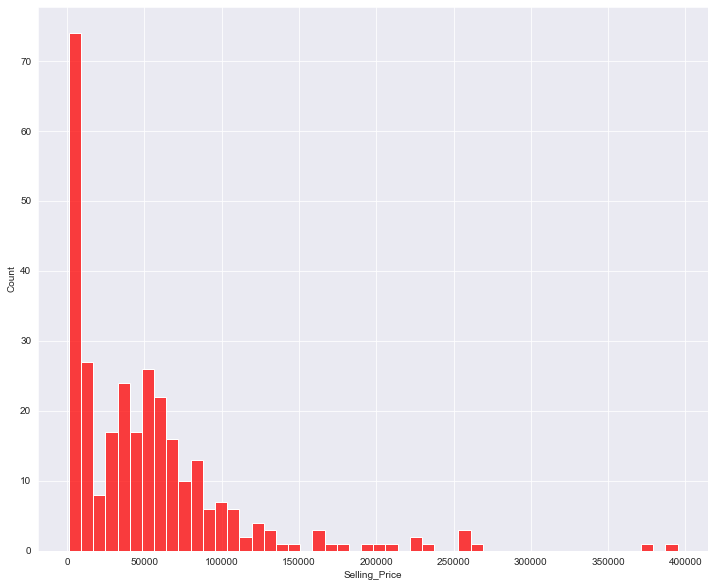

In [47]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.histplot(data=df, x="Selling_Price", bins=50,cbar=True, color="red")

<AxesSubplot:xlabel='Selling_Price'>

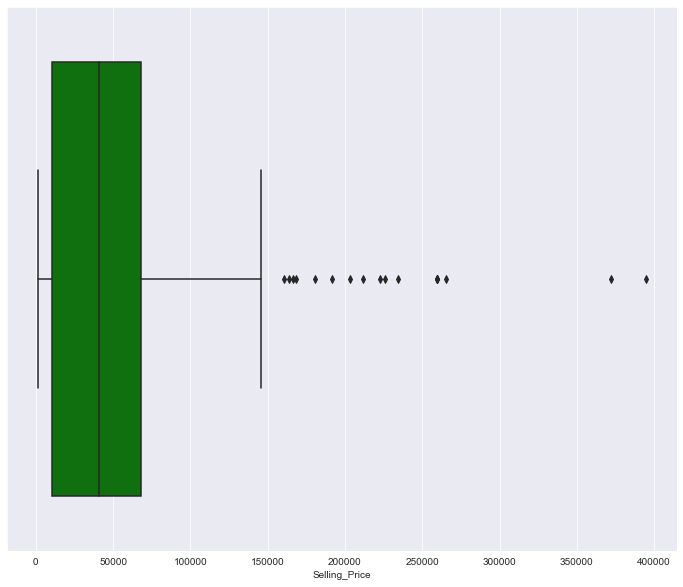

In [48]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x="Selling_Price",color="green")

In [49]:
df["Selling_Price"].describe()

count       301.000000
mean      52607.383056
std       57364.611223
min        1128.600000
25%       10157.400000
50%       40629.600000
75%       67716.000000
max      395010.000000
Name: Selling_Price, dtype: float64

In [50]:
df.corr()["Selling_Price"].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.878983
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

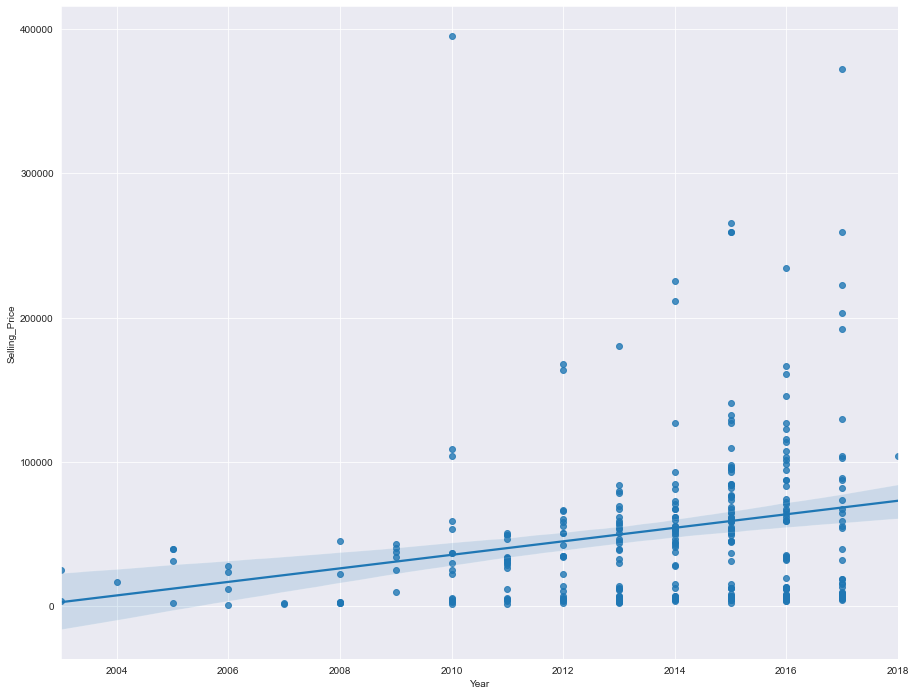

In [51]:
plt.figure(figsize=(15,12))
sns.set_style("darkgrid")
sns.regplot(x=df["Year"], y=df["Selling_Price"])

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

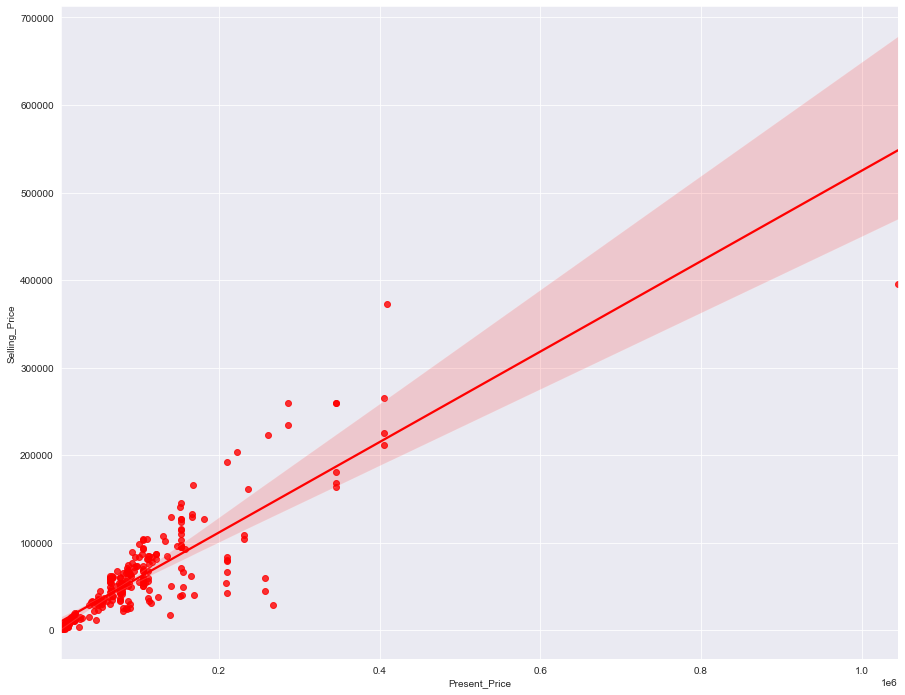

In [52]:
plt.figure(figsize=(15,12))
sns.set_style("darkgrid")
sns.regplot(x=df["Present_Price"], y=df["Selling_Price"],color="red")

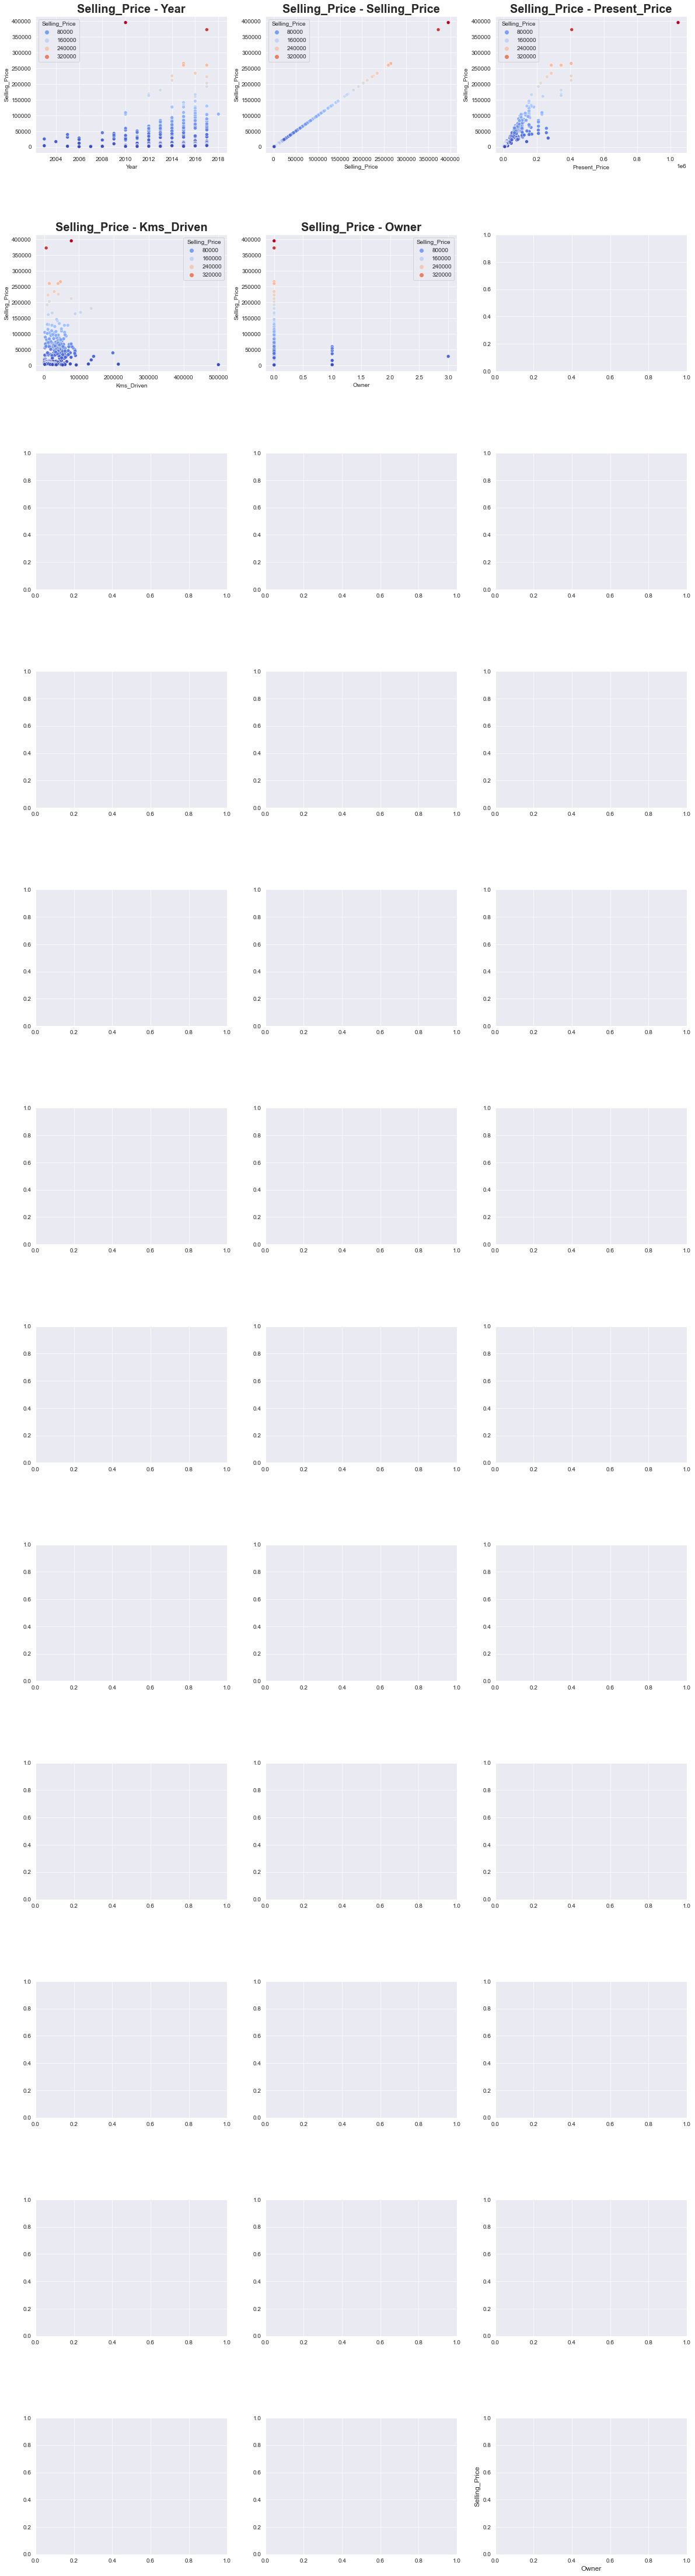

In [53]:
#Visualising numerical predictor variables with Target Variables
train_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
#adjust horizontal space between plots 
fig.subplots_adjust(hspace=0.6)
for i,ax in zip(train_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='Selling_Price', hue='Selling_Price',data=train_num,ax=ax,palette='coolwarm')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('Selling_Price',fontsize=12)
    #ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('Selling_Price'+' - '+str(i),fontweight='bold',size=20)

C:\Users\Bruker\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


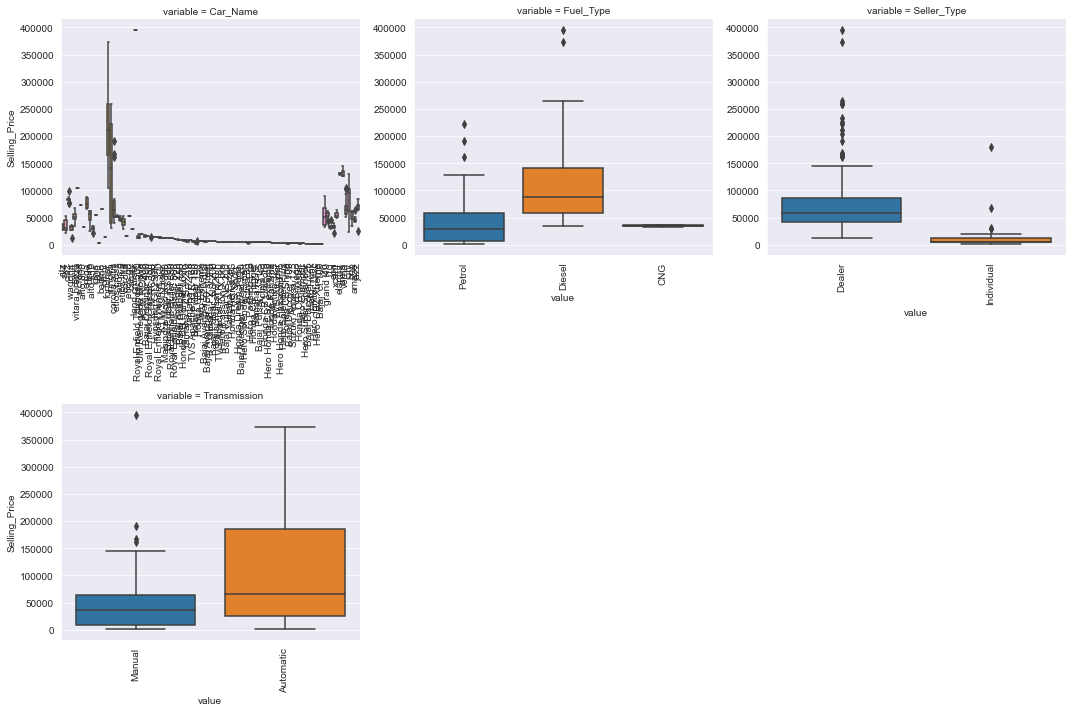

In [54]:
##Visualising Categorical predictor variables with Target Variables
categorical = df.select_dtypes(exclude=['int64','float64'])
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    

f = pd.melt(df, id_vars=['Selling_Price'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "Selling_Price")

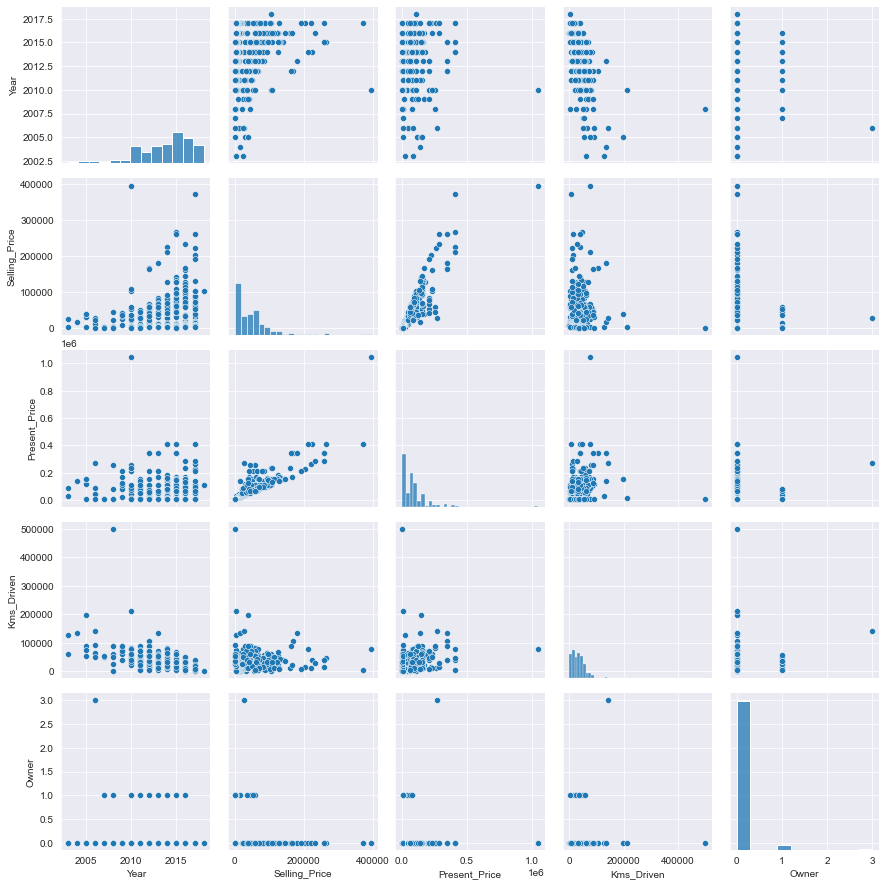

In [55]:
sns.pairplot(df)

<AxesSubplot:>

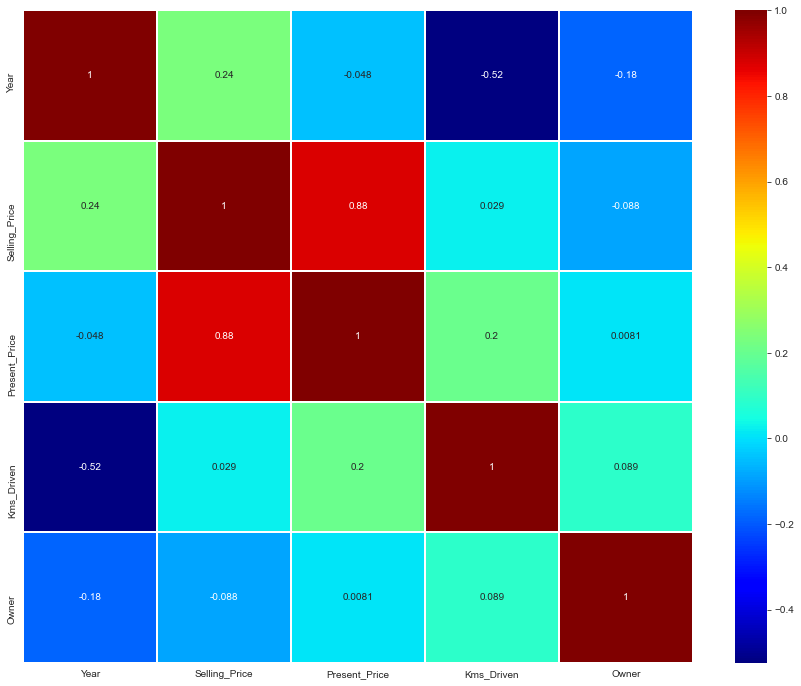

In [56]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap="jet",annot=True,linewidths=1,robust=True)

In [57]:
df.isnull().sum() #There is no missing data in the columns

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## 2. Feature Engineering

In [58]:
df["Current_Year"] = 2021
df["Car's Age"] = df["Current_Year"] -df["Year"]
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car's Age
0,ritz,2014,37808.1,63088.74,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,53608.5,107668.44,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,81823.5,111167.10,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,32165.1,46836.90,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,51915.6,77534.82,42450,Diesel,Dealer,Manual,0,2021,7


In [59]:
#we will drop unnecessary features:
df.drop(["Car_Name","Year","Current_Year"],axis=1,inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car's Age
0,37808.1,63088.74,27000,Petrol,Dealer,Manual,0,7
1,53608.5,107668.44,43000,Diesel,Dealer,Manual,0,8
2,81823.5,111167.10,6900,Petrol,Dealer,Manual,0,4
3,32165.1,46836.90,5200,Petrol,Dealer,Manual,0,10
4,51915.6,77534.82,42450,Diesel,Dealer,Manual,0,7


In [60]:
df = pd.get_dummies(data= df,columns=["Fuel_Type","Seller_Type","Transmission"],drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car's Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,37808.1,63088.74,27000,0,7,0,1,0,1
1,53608.5,107668.44,43000,0,8,1,0,0,1
2,81823.5,111167.10,6900,0,4,0,1,0,1
3,32165.1,46836.90,5200,0,10,0,1,0,1
4,51915.6,77534.82,42450,0,7,1,0,0,1


In [61]:
X = df.drop("Selling_Price",axis=1)
y = df["Selling_Price"]
X.head()

,Present_Price,Kms_Driven,Owner,Car's Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,63088.74,27000,0,7,0,1,0,1
1,107668.44,43000,0,8,1,0,0,1
2,111167.10,6900,0,4,0,1,0,1
3,46836.90,5200,0,10,0,1,0,1
4,77534.82,42450,0,7,1,0,0,1


In [62]:
y.head()

0    37808.1
1    53608.5
2    81823.5
3    32165.1
4    51915.6
Name: Selling_Price, dtype: float64

In [63]:
#Lets find out the importance of features:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [64]:
model.feature_importances_

array([0.35067367, 0.04287587, 0.00039917, 0.07456883, 0.24003658,
       0.00815515, 0.12918273, 0.154108  ])

<AxesSubplot:>

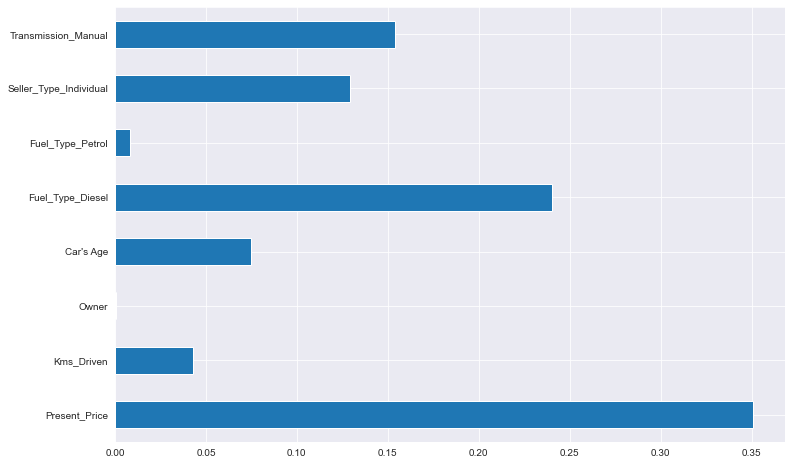

In [65]:
plt.figure(figsize=(12,8))
pd.Series(model.feature_importances_,index=X.columns).plot(kind="barh")

## 3. Model Training

In [66]:
#First lets siplit our data into train and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(270, 8)
(270,)
(31, 8)
(31,)


In [67]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [68]:
#Choosing best hyperparameters:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [69]:
# Create the random grid for these hyperparameters:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [70]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [71]:
random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [72]:
random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [73]:
predictions = random.predict(X_test)

C:\Users\Bruker\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

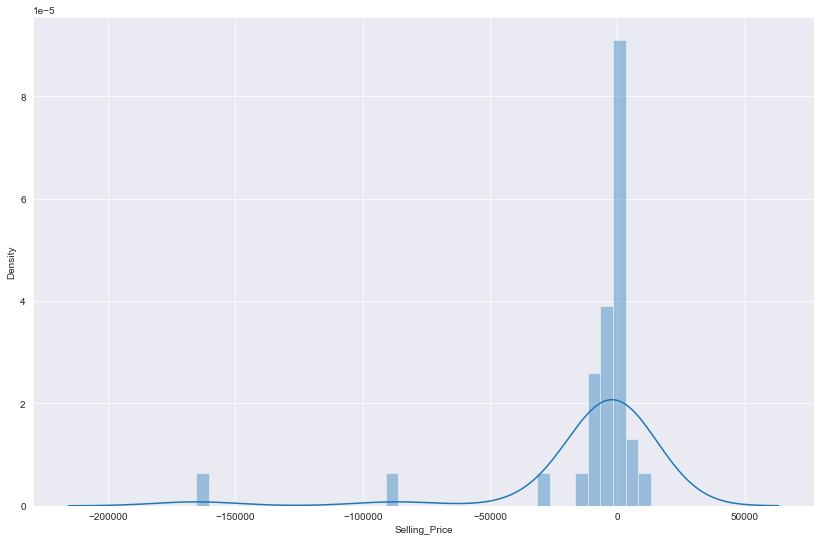

In [74]:
plt.figure(figsize=(14,9))
sns.distplot(y_test-predictions)


<AxesSubplot:ylabel='Selling_Price'>

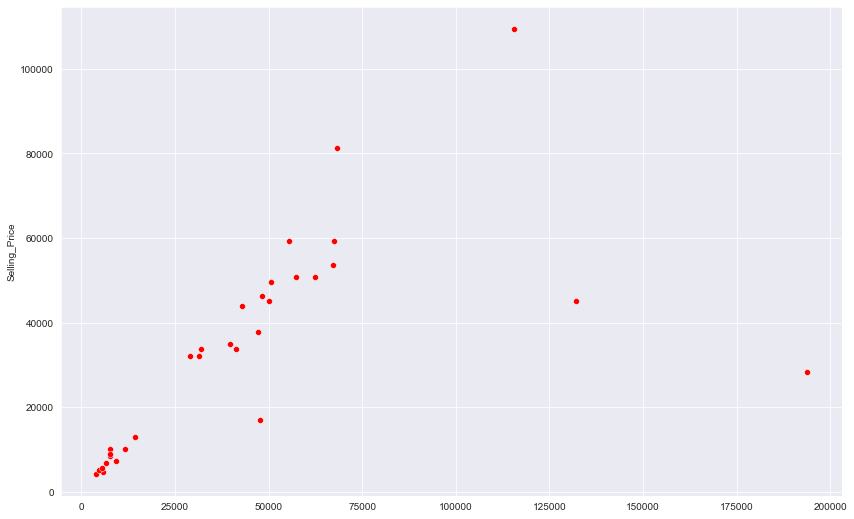

In [75]:
plt.figure(figsize=(14,9))
sns.scatterplot(x=predictions,y=y_test,color="red")

In [76]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 12713.904211876397
MSE: 1185312975.7596998
RMSE: 34428.37457330363


In [77]:
import pickle
# open a file, where you ant to store the data
file = open('latest_model3.pkl', 'wb')

# dump information to that file
pickle.dump(random, file)
file.close()

In [78]:
predictions

array([  7568.85654355,  31895.25078386,   4026.38926526,   9362.72430556,
        50171.88297563,  48201.82755481,  11754.556967  ,  68163.57391835,
        14394.29880024,  62258.78279329,  47167.68263686, 193686.01619757,
        57383.64702804,  55547.11538444, 115584.71850846,   7568.85654355,
         5829.88311544,   4828.35899645,  67482.47353957,   6676.28069373,
        47670.16268593,  67138.01966311,  39607.75056467,  41425.25397423,
       131968.65668004,   7586.02441427,   5572.23628528,  42905.78858739,
        28926.31464286,  50688.36345593,  31391.38481923])

In [81]:
X_test.iloc[:1,:]

,Present_Price,Kms_Driven,Owner,Car's Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
132,10721.7,3500,0,4,0,1,1,1


In [87]:
y_test.iloc[:1,:]

IndexingError: Too many indexers